# German City Foundation

## TO-DO

immer die 10 größten städte labeln

Algorithmus:

Dateinamen formatieren

die imgshow Funktion ersetzen

am Schluss noch folgende Funktion hinzufügen:
mit dem annotate die zu diesem Zeitpunkt 5-10 größten Städte labeln. Labelgröße an Stadtgrößte orientieren?


In [1]:
import pandas as pd
import sqlite3
import matplotlib.image as mpimg

cnx = sqlite3.connect('second_and_better_valid-db.sqlite')

df = pd.read_sql_query("SELECT * FROM CityTable", cnx)

df.head()

,city,gruendungsjahr,breitengrad,laengengrad,einwohnerzahl,jahr_sollte_ueberprueft_werden
0,Andernach,12,50.439722222222,7.4016666666667,29.860,1
1,Kempten (Allgäu),15,47.733333333333,10.316666666667,68.330,1
2,Augsburg,-15,48.371666666667,10.898333333333,292.851,0
3,Neu-Ulm,1810,48.394166666667,9.9988888888889,57.727,0
4,Putbus,1810,54.353333333333,13.471944444444,4396,1


In [2]:
#ich musste ein paar Werte, aber nicht viele, recherchieren und nachtragen

In [3]:
# convert coordinates for plotting:
df['breitengrad'] = df['breitengrad'].astype('float64')
df['laengengrad'] = df['laengengrad'].astype('float64')

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os
#plt.rcParams['axes.labelsize'] = 14
#plt.rcParams['xtick.labelsize'] = 12
#plt.rcParams['ytick.labelsize'] = 12
'''
# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)'''

'\n# Where to save the figures\nPROJECT_ROOT_DIR = "."\nIMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")\n\ndef save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):\n    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)\n    print("Saving figure", fig_id)\n    if tight_layout:\n        plt.tight_layout()\n    plt.savefig(path, format=fig_extension, dpi=resolution)'

In [5]:
df.shape

(652, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 6 columns):
city                              652 non-null object
gruendungsjahr                    652 non-null int64
breitengrad                       652 non-null float64
laengengrad                       652 non-null float64
einwohnerzahl                     652 non-null object
jahr_sollte_ueberprueft_werden    652 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 30.6+ KB


In [7]:
df['einwohnerzahl'] = df['einwohnerzahl'].apply(lambda x: int(str(x).replace('.','')))

In [9]:
def get_cities_which_excisted_in(year):
    return( df[df.gruendungsjahr  <= year])

#example:
get_cities_which_excisted_in(-2)

,city,gruendungsjahr,breitengrad,laengengrad,einwohnerzahl,jahr_sollte_ueberprueft_werden
2,Augsburg,-15,48.371667,10.898333,292851,0
639,Koblenz,-9,50.356667,7.593889,113844,0
641,Speyer,-10,49.317222,8.434167,50931,0
644,Bonn,-12,50.733992,7.099814,325490,0
645,Xanten,-12,51.660278,6.450556,21614,0
646,Mainz,-13,50.000000,8.271111,215110,0
647,Worms,-14,49.633056,8.360833,83081,0
649,Trier,-17,49.759600,6.643900,110013,0
650,Köln,-19,50.938056,6.956944,1080394,0
651,Neuss,-16,51.198611,6.691389,153810,0


Saving figure test


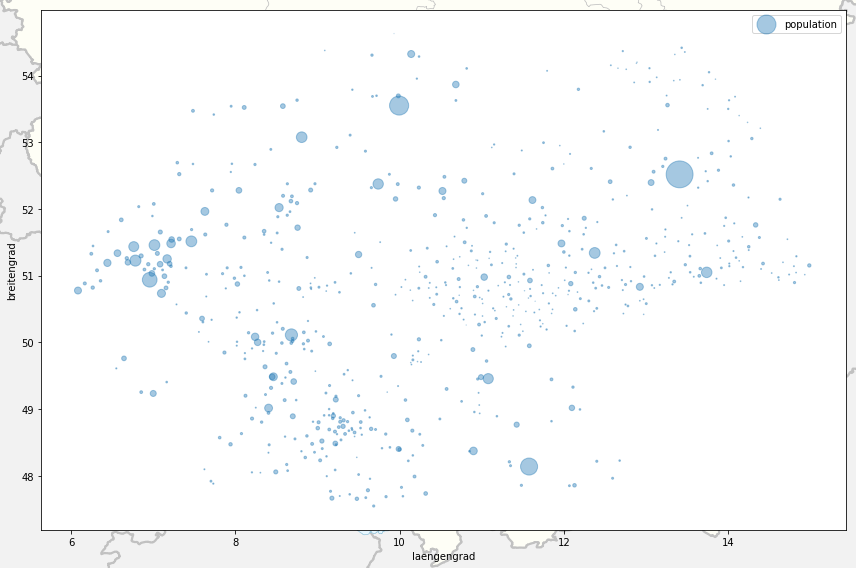

In [15]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "generated_images")

def test_save_img_not_displaying(dataframe, fig_id, tight_layout=True, fig_extension="png", resolution=100):
    ax = dataframe.plot.scatter( x="laengengrad", y="breitengrad", alpha=0.4, s=dataframe["einwohnerzahl"]/5000, label="population",
               figsize=(12,8))
    image = plt.imread("./img/umrisskarte-deutschland.png")
    plt.figimage(image, alpha=0.4)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
    ### irgendwas von figimage noch konfigurieren, sonst hier unten die Plots angucken, sonst auf der codereview Seite
    
test_save_img_not_displaying(df, "test")

In [53]:
ROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "generated_images")


def plot_german_cities(dataframe, fig_id, tight_layout=True, fig_extension="png", resolution=100):
    
    ax = dataframe.plot.scatter( x="laengengrad", y="breitengrad", alpha=0.4, s=dataframe["einwohnerzahl"]/5000, label="population",
               figsize=(12,8))
    '''for i, txt in enumerate(df['city']):
        ax.annotate(df['city'], (df['laengengrad'][i], df['breitengrad'][i]))'''

    ax.annotate('bla', ( 11.5, 48))
    #plt.axis('scaled')
    plt.axes().set_aspect('equal', 'datalim')
    plt.imshow(mpimg.imread('./img/umrisskarte-deutschland.png'), extent=[5.8652753, 15.0395564, 47.4809718, 55.0511637], alpha=0.5,
               cmap=plt.get_cmap("jet"))
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

22
Saving figure 22
503
Saving figure 503


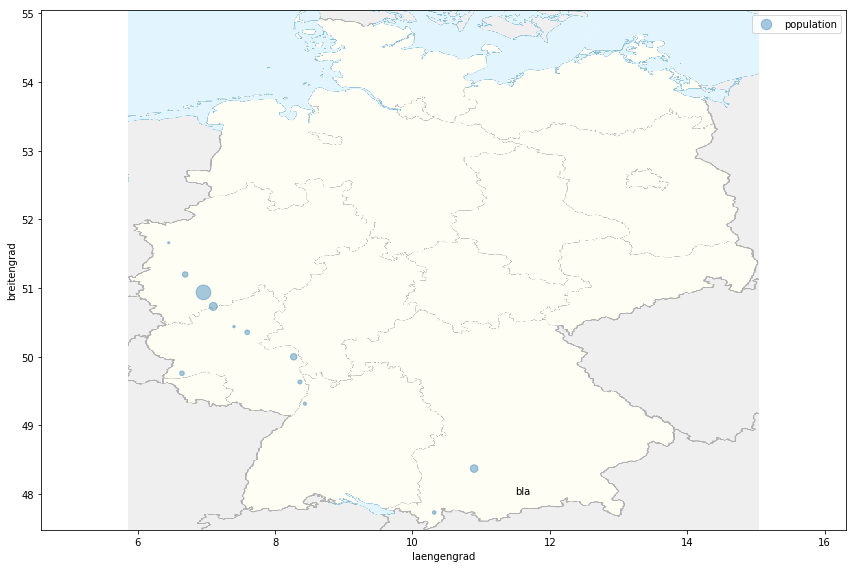

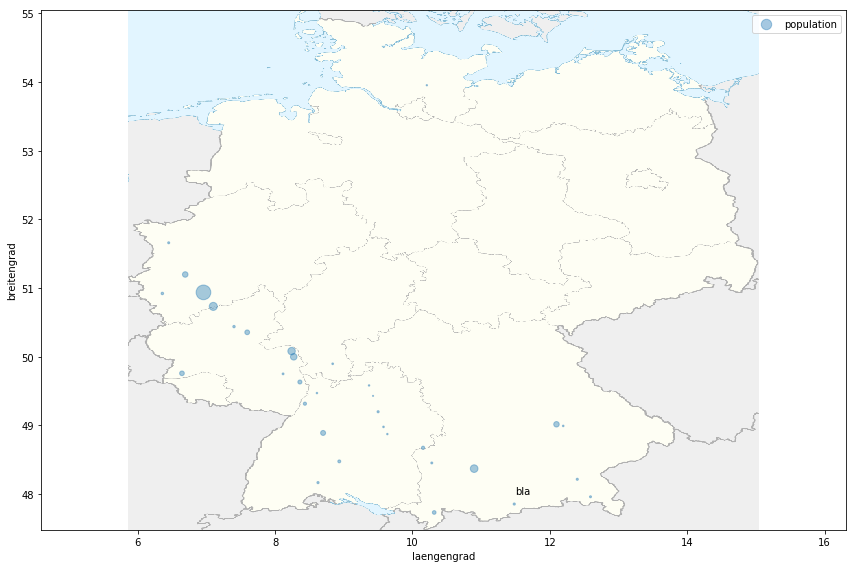

In [54]:
amount_of_cities = df.shape[0]

earliest_year = df['gruendungsjahr'].min()

#for year in range(earliest_year, 2019):
for year in [22, 503]: # for debugging
    print(year)
    dataframe_to_plot = get_cities_which_excisted_in(year)
    plot_german_cities(dataframe_to_plot, str(year))
    #save_german_cities(dataframe_to_plot, year)
    #print(dataframe_to_plot)

In [ ]:
#list(df.columns.values)
#df.plot(kind="scatter", x="laengengrad", y="breitengrad", alpha=0.4, s=df["einwohnerzahl"]/5000, label="population")
#save_fig("bad_visualization_plot")
df.plot.scatter( x="laengengrad", y="breitengrad", alpha=0.4, s=df["einwohnerzahl"]/5000, label="population",
               figsize=(10,10))

In [ ]:
# extent(left, right, bottom, top) attribute needs more accurate values:

#westlichster Punkt: 51.049887,5.8652753
#östlichster Punkt: 51.2727761,15.0395564
#nördlichster Punkt (Spitze Sylt): 55.0511637,8.2088865
#südlichster Punkt: 47.4809718,7.6516408

ax = df.plot.scatter( x="laengengrad", y="breitengrad", alpha=0.4, s=df["einwohnerzahl"]/10000, label="jahr_sollte_ueberprueft_werden",
               figsize=(12.3125,16.6666666))

# not sure waht, but something distorts my picture.
#plt.axis('equal')
plt.axis('scaled')
plt.imshow(mpimg.imread('./img/Karte_Deutschland.png'), extent=[5.8652753, 15.0395564, 47.4809718, 55.0511637], alpha=0.5,
           cmap=plt.get_cmap("jet"))

In [ ]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=47.1,urcrnrlat=55.2, llcrnrlon=5.5,urcrnrlon=15.3, resolution='l')

m.bluemarble()
# m.etopo()

In [ ]:
import geopandas as gpd
import geoplot as gplt

from quilt.data.ResidentMario import geoplot_data
continental_cities = gpd.read_file(geoplot_data.usa_cities()).query('POP_2010 > 100000')
contiguous_usa = gpd.read_file(geoplot_data.contiguous_usa())
continental_cities.head()

ax = gplt.pointplot(continental_cities)
gplt.polyplot(contiguous_usa, ax=ax)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

austin = (-97.75, 30.25)
hawaii = (-157.8, 21.3)
washington = (-77.01, 38.90)
chicago = (-87.68, 41.83)
losangeles = (-118.25, 34.05)

m = Basemap(projection = 'merc', llcrnrlat=10, urcrnrlat=50,
        llcrnrlon=-160, urcrnrlon=-60)

#m.drawcoastlines()
m.fillcontinents (color='lightgray', lake_color='lightblue')
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

#m.drawcounties()

x, y = m(*zip(*[hawaii, austin, washington, chicago, losangeles]))
m.plot(x,y, marker ='o', markersize=6, markerfacecolor='red', linewidth=0)

plt.title('Mercator Projection')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(20,10))  # predefined figure size, change to your liking. 
# But doesn't matter if you save to any vector graphics format though (e.g. pdf)
ax = fig.add_axes([0.05,0.05,0.9,0.85])

# These coordinates form the bounding box of Germany
bot, top, left, right = 5.87, 15.04, 47.26, 55.06 # just to zoom in to only Germany
map = Basemap(projection='merc', resolution='l',
    llcrnrlat=left,
    llcrnrlon=bot,
    urcrnrlat=right,
    urcrnrlon=top)
map.readshapefile('./gadm36_DEU_shp/gadm36_DEU_0', 'rds', drawbounds=True)  # plots the state boundaries, read explanation below code
map.drawcoastlines()
map.fillcontinents(color='#f0f8ff')

long1 = np.array([ 13.404954,  11.581981,   9.993682,   8.682127,   6.960279,
6.773456,   9.182932,  12.373075,  13.737262,  11.07675 ,
7.465298,   7.011555,  12.099147,   9.73201 ,   7.628279,
8.801694,  10.52677 ,   8.466039,   8.239761,  10.89779 ,
8.403653,   8.532471,   7.098207,   7.216236,   9.987608,
7.626135,  11.627624,   6.852038,  10.686559,   8.047179,
8.247253,   6.083887,   7.588996,   9.953355,  10.122765])

lat1 = np.array([ 52.520007,  48.135125,  53.551085,  50.110922,  50.937531,
51.227741,  48.775846,  51.339695,  51.050409,  49.45203 ,
51.513587,  51.455643,  54.092441,  52.375892,  51.36591 ,
53.079296,  52.268874,  49.487459,  50.078218,  48.370545,
49.00689 ,  52.030228,  50.73743 ,  51.481845,  48.401082,
51.960665,  52.120533,  51.47512 ,  53.865467,  52.279911,
49.992862,  50.775346,  50.356943,  49.791304,  54.323293])

long1 = np.array( df['breitengrad'])
lat1 = np.array(df['laengengrad'])

x, y = map(long1, lat1)
print( x[0])
#x, y = map(laengengrad, breitengrad)
map.plot(x,y,'.')  # Use the dot-marker or use a different marker, but specify the `markersize`.

#https://stackoverflow.com/questions/28181415/decrease-size-of-markers-used-in-basemap-and-get-fullscreen